Persiapan data hepatitis

In [1]:
import pandas as pd

df = pd.read_csv('hepatitis.csv', delimiter=',')
# df.drop(['No'], axis=1, inplace=True)
df.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
1,50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
2,78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
3,31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
4,34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live


Melihat status status setiap kolom untuk diketahui jenis data nya

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              155 non-null    int64  
 1   sex              155 non-null    object 
 2   steroid          154 non-null    object 
 3   antivirals       155 non-null    bool   
 4   fatigue          154 non-null    object 
 5   malaise          154 non-null    object 
 6   anorexia         154 non-null    object 
 7   liver_big        145 non-null    object 
 8   liver_firm       144 non-null    object 
 9   spleen_palpable  150 non-null    object 
 10  spiders          150 non-null    object 
 11  ascites          150 non-null    object 
 12  varices          150 non-null    object 
 13  bilirubin        149 non-null    float64
 14  alk_phosphate    126 non-null    float64
 15  sgot             151 non-null    float64
 16  albumin          139 non-null    float64
 17  protime         

Terlihat bahwa terdapat jumlah Non-null yang tidak rata, untuk lebih pasti lagi, kita bisa melihat jumlah data yang hilang dengan mengetahui presentase data yang hilang

In [27]:
df_null = round(100*(df.isnull().sum())/len(df), 2)
df_null

age                 0.00
sex                 0.00
steroid             0.65
antivirals          0.00
fatigue             0.65
malaise             0.65
anorexia            0.65
liver_big           6.45
liver_firm          7.10
spleen_palpable     3.23
spiders             3.23
ascites             3.23
varices             3.23
bilirubin           3.87
alk_phosphate      18.71
sgot                2.58
albumin            10.32
protime            43.23
histology           0.00
class               0.00
dtype: float64

Dari hasil diatas, terlihat bahwa terdapat beberapa kolom yang presentase nilai kosongnya lebih dari 0 persen, untuk itu kita akan menghapus kolom yang memiliki presentase nilai kosong lebih dari 0 persen dengan menggunakan fungsi `dropna()`, lalu cek lagi apakah jumlah datanya selaras dengan fungsi `info()`

In [28]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80 entries, 5 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              80 non-null     int64  
 1   sex              80 non-null     object 
 2   steroid          80 non-null     object 
 3   antivirals       80 non-null     bool   
 4   fatigue          80 non-null     object 
 5   malaise          80 non-null     object 
 6   anorexia         80 non-null     object 
 7   liver_big        80 non-null     object 
 8   liver_firm       80 non-null     object 
 9   spleen_palpable  80 non-null     object 
 10  spiders          80 non-null     object 
 11  ascites          80 non-null     object 
 12  varices          80 non-null     object 
 13  bilirubin        80 non-null     float64
 14  alk_phosphate    80 non-null     float64
 15  sgot             80 non-null     float64
 16  albumin          80 non-null     float64
 17  protime          

Looks good!!, saatnya mengetahui korelasi antar feature/kolom dengan menggunakan fungsi `corr()`

                    age  antivirals  bilirubin  alk_phosphate      sgot  \
age            1.000000    0.043308   0.160752       0.088183 -0.132269   
antivirals     0.043308    1.000000  -0.200767      -0.203513 -0.141556   
bilirubin      0.160752   -0.200767   1.000000       0.316916  0.315108   
alk_phosphate  0.088183   -0.203513   0.316916       1.000000  0.349342   
sgot          -0.132269   -0.141556   0.315108       0.349342  1.000000   
albumin       -0.220464    0.252072  -0.343683      -0.409635 -0.113103   
protime       -0.190169   -0.007032  -0.362055      -0.212012 -0.144540   
histology      0.310650   -0.211362   0.233525       0.245068  0.097489   

                albumin   protime  histology  
age           -0.220464 -0.190169   0.310650  
antivirals     0.252072 -0.007032  -0.211362  
bilirubin     -0.343683 -0.362055   0.233525  
alk_phosphate -0.409635 -0.212012   0.245068  
sgot          -0.113103 -0.144540   0.097489  
albumin        1.000000  0.434659  -0.3965

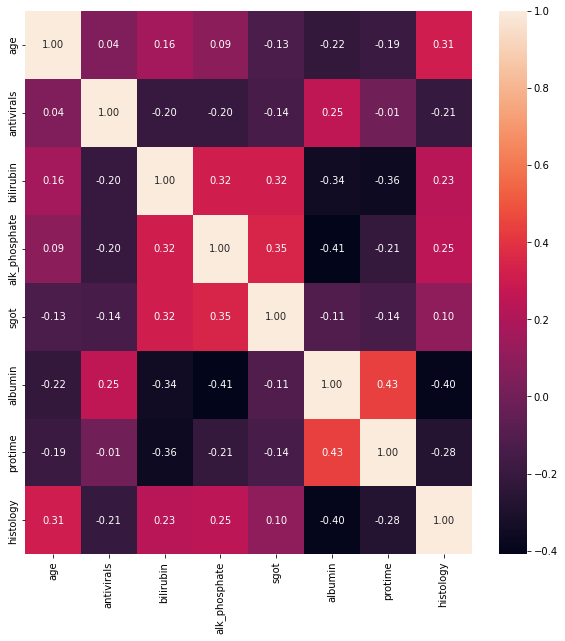

In [29]:
# find correlation between features then plot it
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
print(corr)
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()


In [30]:
# label the data using sklearn.preprocessing.LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_labelled = df.apply(le.fit_transform)
df_labelled.head()


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
5,11,0,1,0,0,0,0,1,0,0,0,0,0,6,30,8,14,34,0,1
10,16,0,0,1,0,0,0,0,1,0,0,0,0,9,23,10,18,39,0,1
11,9,0,1,1,1,0,0,1,1,0,1,0,0,7,14,55,11,20,0,1
12,18,0,1,1,1,0,0,1,1,0,0,0,0,6,25,24,13,19,0,1
13,7,0,1,0,1,0,0,1,1,0,0,0,0,16,12,44,22,37,0,1


In [31]:
# transform the data using sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_labelled), columns=df_labelled.columns)
df_scaled.head()


,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,0.282051,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.272727,0.517241,0.140351,0.608696,0.829268,0.0,1.0
1,0.410256,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.409091,0.396552,0.175439,0.782609,0.951220,0.0,1.0
2,0.230769,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.318182,0.241379,0.964912,0.478261,0.487805,0.0,1.0
3,0.461538,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.272727,0.431034,0.421053,0.565217,0.463415,0.0,1.0
4,0.179487,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.727273,0.206897,0.771930,0.956522,0.902439,0.0,1.0


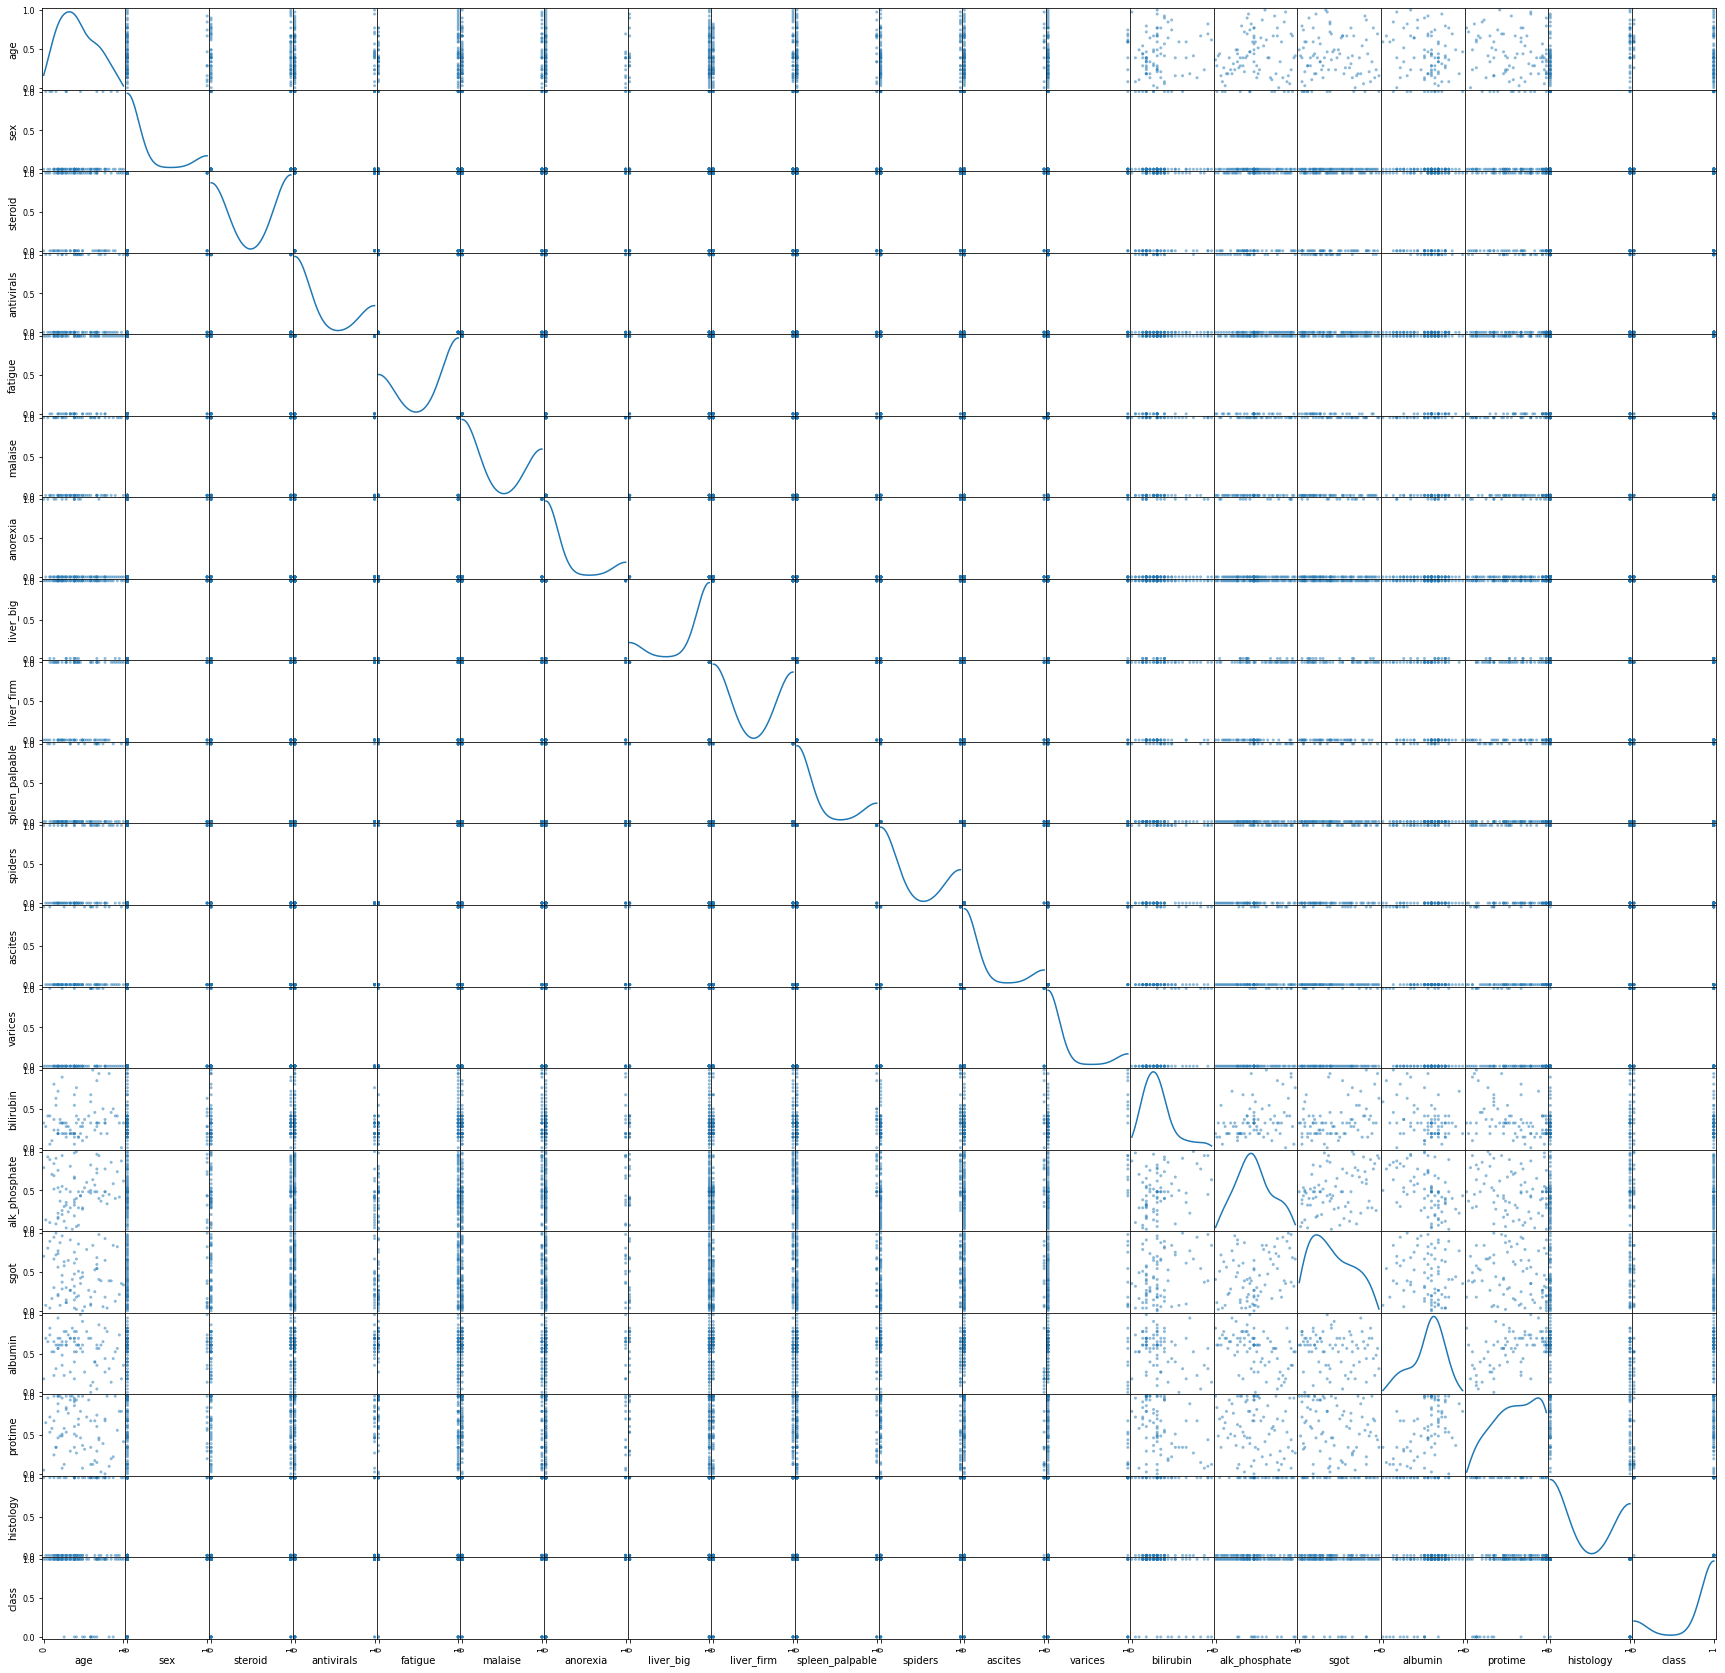

In [37]:
import matplotlib.pyplot as plt


# plot every column against each other
pd.plotting.scatter_matrix(df_scaled, figsize=(30, 30), diagonal='kde')
plt.show()

In [ ]:
plt.scatter(df['age'], df['albumin'], s=75,c="c",marker="o", alpha=0.5)
plt.show()

K=3 untuk mengetahui tingkatan hepatitis dari tinggi, sedang, dan rendah

In [33]:
# k-means clustering
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3)
kmeans.fit(df_scaled)
kmeans.cluster_centers_

# predict the cluster for each data point
kmeans.labels_
df['cluster_id'] = kmeans.labels_
# kmeans.labels_ unique value


Penentuan K diatas masih diragukan, untuk membantu pemilihan cluster yang tepat, kita bisa menggunakan metode elbow curve method

In [ ]:
# Elbow Curve
# calculate distortion for a range of number of cluster
distortions = []
range_n_clusters = range(2, 10)
for i in range_n_clusters:
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=3000, random_state=0)
    km.fit(df_scaled)
    distortions.append(km.inertia_)

# plot
plt.plot(range_n_clusters, distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

Grafik elbow curve diatas masih terlihat belum jelas (karena targetnya adalah memilih cluster dengan lekukan distortion yang berubah pesat, seperti titik dengan bengokan yang pesat), untuk itu kita bisa menggunakan metode silhouette score

In [ ]:
# import silhouette_score
from sklearn.metrics import silhouette_score

range_n_clusters = range(2, 10)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(df_scaled)

    # assign the label
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))



Berdasarkan silhouette score diatas, terlihat bahwa nilai silhouette score tertinggi terjadi pada cluster 2, untuk itu kita akan menggunakan cluster 2 untuk melakukan clustering

In [ ]:
# k-means clustering
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2)
kmeans.fit(df_scaled)
kmeans.cluster_centers_

# predict the cluster for each data point
kmeans.labels_
df['cluster_id'] = kmeans.labels_

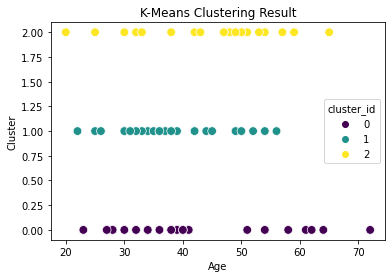

In [36]:

sns.scatterplot(x='age', y='cluster_id', hue='cluster_id', data=df, palette='viridis',marker="o", s=75)

plt.title('K-Means Clustering Result')
plt.xlabel('Age')
plt.ylabel('Cluster')

# increase size of the plot
# plt.rcParams['figure.figsize'] = [10, 10]

plt.show()